In [124]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

In [125]:
file_location = '/Users/yanhewu/Documents/git/CausesOfDeath/Dataset/causeofdeath.csv'
df = pd.read_csv(file_location)

In [126]:
df.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

In [127]:
df.dtypes

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                     float64
Age-adjusted Death Rate    float64
dtype: object

In [128]:
#descriptive statistics summary
df['Deaths'].describe()

count    1.501300e+04
mean     1.023261e+04
std      9.003261e+04
min      1.000000e+01
25%      2.940000e+02
50%      8.380000e+02
75%      2.737000e+03
max      2.712630e+06
Name: Deaths, dtype: float64

***Problem 1: What is the distribution of health related deaths in the united states?***

In [129]:
#Keep health related deaths columns for question 1&2, ~drop, remove ~ will keep isin
df_health = df[~df['Cause Name'].isin(["All Causes","CLRD","Homicide","Suicide","Unintentional Injuries"])]

In [130]:
#List Unique value of cause of death, find out health realted cause
DeathCause = df_health['Cause Name'].unique()
DeathCause

array(["Alzheimer's disease", 'Stroke',
       'Chronic liver disease and cirrhosis', 'Diabetes',
       'Diseases of Heart',
       'Essential hypertension and hypertensive renal disease',
       'Influenza and pneumonia', 'Cancer', 'Kidney Disease',
       "Parkinson's disease", 'Pneumonitis due to solids and liquids',
       'Septicemia'], dtype=object)

In [131]:
#Sum death number by cause
sum_by_cause = df_health['Deaths'].groupby(df_health['Cause Name']).sum()
sum_by_cause

Cause Name
Alzheimer's disease                                       2514618.0
Cancer                                                   19292996.0
Chronic liver disease and cirrhosis                       1043674.0
Diabetes                                                  2472642.0
Diseases of Heart                                        21879846.0
Essential hypertension and hypertensive renal disease      841098.0
Influenza and pneumonia                                   1974864.0
Kidney Disease                                            1515868.0
Parkinson's disease                                        696518.0
Pneumonitis due to solids and liquids                      589791.0
Septicemia                                                1188968.0
Stroke                                                    4875996.0
Name: Deaths, dtype: float64

In [132]:
#remove non-health related cause
#sum_by_cause = sum_by_cause.drop(["All Causes","CLRD","Homicide","Suicide","Unintentional Injuries"], axis=0)
#sum_by_cause

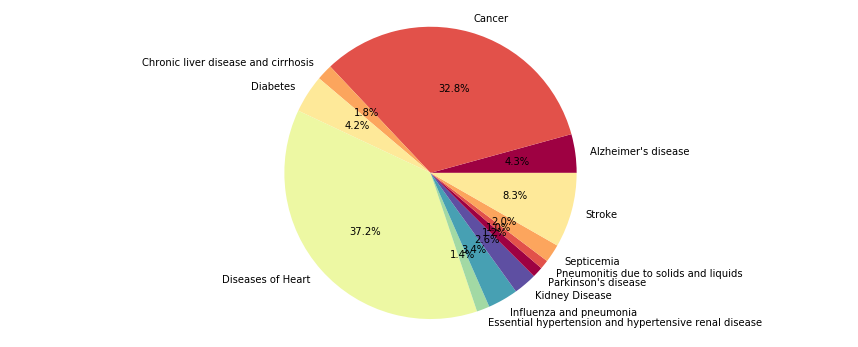

In [133]:
# Create a list of colors
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

#create a pie chart
plt.pie(sum_by_cause, labels=sum_by_cause.index, shadow=False, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

***Problem 2: What are the top 10 states with highest number of health related deaths?***


In [134]:
#state = df_health['State'].unique()
state = df_health.State.unique()
state
#State_count = df_health.groupby(df_health['State']).count()
#State_count

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [135]:
#Top 10 states with highest number of health related deaths
sum_by_state = df_health['Deaths'].groupby(df_health['State']).sum()
sum_by_state.nlargest(11)

State
United States     29443454.0
California         2921655.0
Florida            2024325.0
New York           1925649.0
Texas              1908545.0
Pennsylvania       1547275.0
Ohio               1306258.0
Illinois           1266047.0
Michigan           1072434.0
North Carolina      892391.0
New Jersey          889968.0
Name: Deaths, dtype: float64

***Problem 3: What is the nationwide trend over the available years, predict to 2030.***
 

In [142]:
#Trend analysis
print(df.head())
print('\n Data Types:')
print(df.dtypes)

   Year                                     113 Cause Name  \
0  1999  Accidents (unintentional injuries) (V01-X59,Y8...   
1  1999  Accidents (unintentional injuries) (V01-X59,Y8...   
2  1999  Accidents (unintentional injuries) (V01-X59,Y8...   
3  1999  Accidents (unintentional injuries) (V01-X59,Y8...   
4  1999  Accidents (unintentional injuries) (V01-X59,Y8...   

               Cause Name       State  Deaths  Age-adjusted Death Rate  
0  Unintentional Injuries     Alabama  2313.0                     52.2  
1  Unintentional Injuries      Alaska   294.0                     55.9  
2  Unintentional Injuries     Arizona  2214.0                     44.8  
3  Unintentional Injuries    Arkansas  1287.0                     47.6  
4  Unintentional Injuries  California  9198.0                     28.7  

 Data Types:
Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                     float64


In [155]:
#get ready for the Time series, keep year and death
df_ts = df.drop(['113 Cause Name', 'Cause Name', 'Age-adjusted Death Rate'], axis = 1)

# Update state name to get result for different states
df_ts_state = df_ts[df_ts['State'].isin(['Alabama'])]

#get total deaths for each year of state
df_ts_state = df_ts_state['Deaths'].groupby(df_ts_state['Year']).agg({'Total Deaths':['sum']})
print(df_ts_state)

     Total Deaths
              sum
Year             
1999      82613.0
2000      82904.0
2001      83314.0
2002      84664.0
2003      85445.0
2004      84377.0
2005      85924.0
2006      85356.0
2007      84675.0
2008      86542.0
2009      86054.0
2010      86771.0
2011      87487.0
2012      88070.0
2013      89778.0
2014      90473.0
2015      93982.0


In [156]:
df_ts_state.index

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')